In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import torch

In [2]:
time_t = []
desired_FL = []
desired_FR = []
desired_RL = []
desired_RR = []
t = 0

gait_indices = 0
frequencies = 3.
phase = 0.5
offsets = 0
bounds = 0
durations = 0.5
kappa = 0.3
dt = 0.002
smoothing_cdf_start = torch.distributions.normal.Normal(0,kappa).cdf
gait_indices = torch.zeros(1, dtype = torch.float, device = 'cpu', requires_grad= False)



for i in range(500):
    t += dt
    time_t.append(t)
    gait_indices = torch.remainder(gait_indices + dt * frequencies, 1.0)
    foot_indices = [gait_indices,
                    torch.remainder(gait_indices + phase, 1.0),
                    torch.remainder(gait_indices + phase, 1.0),
                    gait_indices]
    for idx, foot_index in enumerate(foot_indices):
        # Map the foot index to a range suitable for the CDF (e.g., -2 to 2)
        mapped_index = (foot_index - 0.5) * 4  # Adjust this range as necessary

        contact_signal = smoothing_cdf_start(mapped_index)
        
        # Assign the calculated contact signal to the appropriate list
        if idx == 0:
            desired_FL.append(contact_signal)
        elif idx == 1:
            desired_FR.append(contact_signal)
        elif idx == 2:
            desired_RL.append(contact_signal)
        else:
            desired_RR.append(contact_signal)

desired_FL = torch.tensor(desired_FL).squeeze()
desired_FR = torch.tensor(desired_FR).squeeze()
desired_RL = torch.tensor(desired_RL).squeeze()
desired_RR = torch.tensor(desired_RR).squeeze()


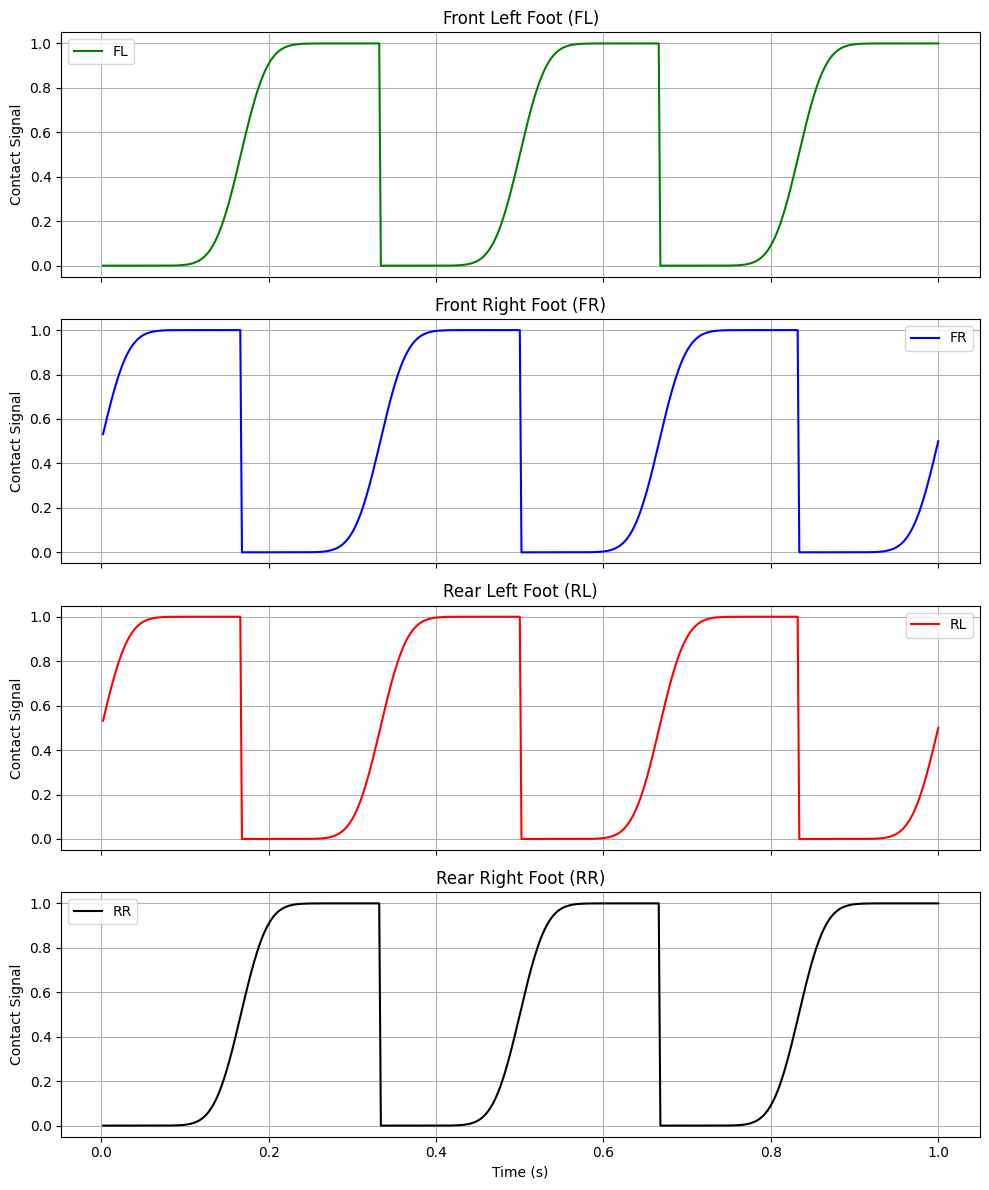

In [3]:
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

axs[0].plot(time_t, desired_FL, 'g-', label="FL")
axs[0].set_title("Front Left Foot (FL)")
axs[0].legend()

axs[1].plot(time_t, desired_FR, 'b-', label="FR")
axs[1].set_title("Front Right Foot (FR)")
axs[1].legend()

axs[2].plot(time_t, desired_RL, 'r-', label="RL")
axs[2].set_title("Rear Left Foot (RL)")
axs[2].legend()

axs[3].plot(time_t, desired_RR, 'k-', label="RR")
axs[3].set_title("Rear Right Foot (RR)")
axs[3].legend()

for ax in axs:
    ax.set_ylabel("Contact Signal")
    ax.grid(True)
axs[-1].set_xlabel("Time (s)")

plt.tight_layout()
plt.show()
